In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from scipy import interpolate
import numpy as np

In [2]:
df = pd.read_csv("motion_results.csv")

In [3]:
x = np.array(df["x"])
y = np.array(df["y"])
r = np.array(df["r"])
U = np.array(df["U"])

In [4]:
# reading the parameters
infile = open("parameters.txt", "r")
N = float(infile.readline())
m = float(infile.readline())
M = float(infile.readline())
R = float(infile.readline())

infile.close()

In [5]:
def k(m, M):
    
    return m/M

def lamda(m, M):
    
    return k(m, M)/(1 + k(m, M))

def s(m, M, R, x, y):
    
    tmp = y**2 + (x - (1 - lamda(m, M))*R)**2
    
    return tmp**0.5

def S(m, M, R, x, y):
    
    tmp = y**2 + (x + lamda(m, M) * R)**2
    
    return tmp**0.5

def U_2d(m, M, R, x, y):
    
    l_val = lamda(m, M)
    S_val = S(m, M, R, x, y)
    s_val = s(m, M, R, x, y)
    
    return -2 * (1 - l_val) * R/S_val - 2*l_val * R/s_val - (np.sqrt(x**2 + y**2)/R)**2

In [14]:
N = 2.5

In [15]:
x = np.linspace(-int(N), int(N), 1000)
y = np.linspace(-int(N), int(N), 1000)
X,Y = np.meshgrid(x,y)

In [16]:
UU = U_2d(m, M, R, X, Y)

In [20]:
lamda(m, M)

0.09090909090909091

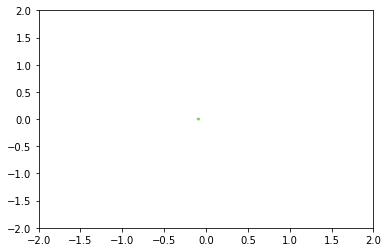

In [17]:
plt.contour(X, Y, UU)